====================================================
Classical Machine Learning Pipeline for Video Actions
====================================================

This script implements and compares three classical
machine learning algorithms using extracted video
features:

1. Support Vector Machine (Linear + RBF)
2. Random Forest Classifier
3. k-Nearest Neighbors (k-NN)

Features are extracted using existing project modules:
- data_loader.py
- feature_extraction.py

Author: Student_2024AB05275

In [1]:
# =========================
# Standard Library Imports
# =========================
from typing import Dict, Tuple
import warnings

# =========================
# Third-Party Imports
# =========================
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# =========================
# Project Imports
# =========================
from data_loader import load_split_data_and_extract_features

In [2]:
# =========================
# Global Configurations
# =========================
warnings.filterwarnings("ignore")
RANDOM_STATE = 42
CV_FOLDS = 5


# ==================================================
# Utility Functions
# ==================================================
def evaluate_model(
    model,
    X_test: np.ndarray,
    y_test: np.ndarray,
) -> Dict[str, float]:
    """
    Evaluate a trained model using multiple metrics.

    Returns:
        Dictionary containing accuracy, precision, recall, and F1-score.
    """
    y_pred = model.predict(X_test)

    return {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average="macro"),
        "recall": recall_score(y_test, y_pred, average="macro"),
        "f1_score": f1_score(y_test, y_pred, average="macro"),
    }


def plot_confusion_matrix(model, X_test, y_test, title: str) -> None:
    """
    Plot confusion matrix for a trained classifier.
    """
    cm = confusion_matrix(y_test, model.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(title)
    plt.show()

In [3]:
# ==================================================
# Data Loading & Feature Extraction
# ==================================================
print("\n📥 Loading dataset splits and extract features...")

X_train, y_train = load_split_data_and_extract_features(split_name="train")
X_val, y_val = load_split_data_and_extract_features(split_name="val")
X_test, y_test = load_split_data_and_extract_features(split_name="test")

print(f"Train shape: {X_train.shape}")
print(f"Test shape : {X_test.shape}")


📥 Loading dataset splits and extract features...
[INFO] * processing Video file : class_1_Basketball/v_Basketball_g13_c04.avi
[INFO] * processing Video file : class_1_Basketball/v_Basketball_g15_c05.avi
[INFO] * processing Video file : class_1_Basketball/v_Basketball_g19_c05.avi
[INFO] * processing Video file : class_1_Basketball/v_Basketball_g17_c01.avi
[INFO] * processing Video file : class_1_Basketball/v_Basketball_g12_c01.avi
[INFO] * processing Video file : class_1_Basketball/v_Basketball_g20_c02.avi
[INFO] * processing Video file : class_1_Basketball/v_Basketball_g15_c07.avi
[INFO] * processing Video file : class_1_Basketball/v_Basketball_g15_c02.avi
[INFO] * processing Video file : class_1_Basketball/v_Basketball_g15_c06.avi
[INFO] * processing Video file : class_1_Basketball/v_Basketball_g18_c01.avi
[INFO] * processing Video file : class_1_Basketball/v_Basketball_g16_c02.avi
[INFO] * processing Video file : class_1_Basketball/v_Basketball_g21_c05.avi
[INFO] * processing Video 


🚀 Training Support Vector Machine...


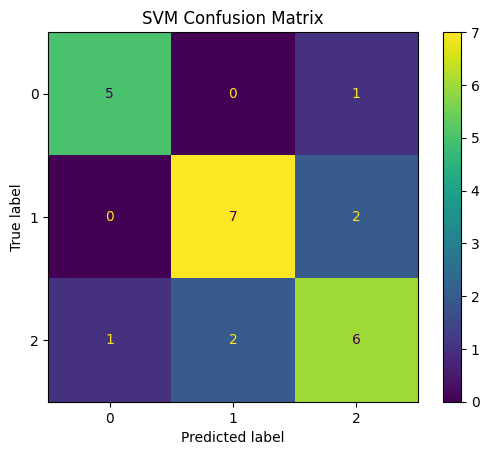

In [4]:
# ==================================================
# 1️⃣ Support Vector Machine (Linear + RBF)
# ==================================================
print("\n🚀 Training Support Vector Machine...")

svm_pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("svm", SVC()),
    ]
)

svm_param_grid = [
    {"svm__kernel": ["linear"], "svm__C": [0.1, 1, 10]},
    {
        "svm__kernel": ["rbf"],
        "svm__C": [0.1, 1, 10],
        "svm__gamma": [0.01, 0.1, 1],
    },
]

svm_grid = GridSearchCV(
    svm_pipeline,
    svm_param_grid,
    cv=CV_FOLDS,
    scoring="accuracy",
    n_jobs=-1,
)

svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_

svm_metrics = evaluate_model(best_svm, X_test, y_test)
plot_confusion_matrix(best_svm, X_test, y_test, "SVM Confusion Matrix")


🌲 Training Random Forest...


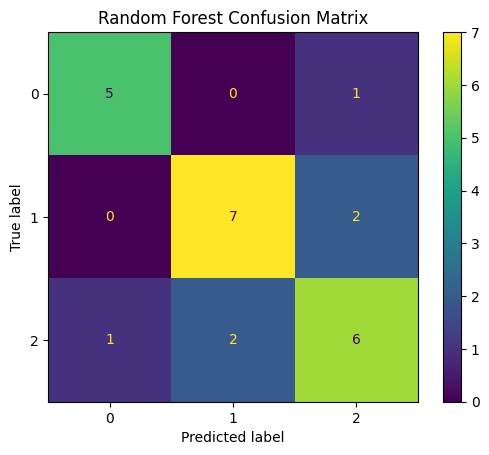

In [5]:
# ==================================================
# 2️⃣ Random Forest Classifier
# ==================================================
print("\n🌲 Training Random Forest...")

rf = RandomForestClassifier(random_state=RANDOM_STATE)

rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
}

rf_grid = GridSearchCV(
    rf,
    rf_param_grid,
    cv=CV_FOLDS,
    scoring="accuracy",
    n_jobs=-1,
)

rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

rf_metrics = evaluate_model(best_rf, X_test, y_test)
plot_confusion_matrix(best_rf, X_test, y_test, "Random Forest Confusion Matrix")


📏 Training k-Nearest Neighbors...


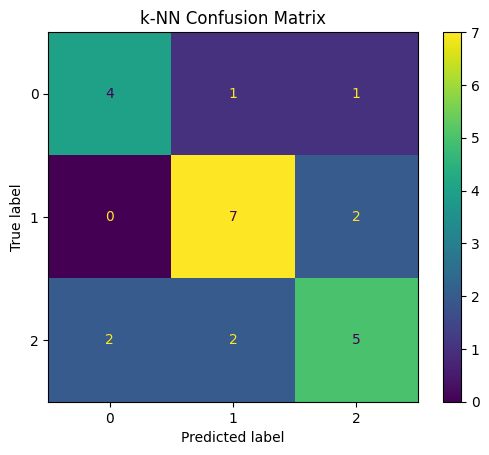

In [6]:
# ==================================================
# 3️⃣ k-Nearest Neighbors
# ==================================================
print("\n📏 Training k-Nearest Neighbors...")

knn_pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier()),
    ]
)

knn_param_grid = {
    "knn__n_neighbors": [3, 5, 7, 9],
    "knn__metric": ["euclidean", "manhattan"],
}

knn_grid = GridSearchCV(
    knn_pipeline,
    knn_param_grid,
    cv=CV_FOLDS,
    scoring="accuracy",
    n_jobs=-1,
)

knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_

knn_metrics = evaluate_model(best_knn, X_test, y_test)
plot_confusion_matrix(best_knn, X_test, y_test, "k-NN Confusion Matrix")

In [7]:
# ==================================================
# 📊 Comparative Analysis
# ==================================================
print("\n📊 Comparative Model Analysis")

results = {
    "SVM": svm_metrics,
    "Random Forest": rf_metrics,
    "k-NN": knn_metrics,
}

# Convert to matrix for plotting
metrics_names = list(next(iter(results.values())).keys())
model_names = list(results.keys())

metrics_matrix = np.array(
    [[results[m][metric] for metric in metrics_names] for m in model_names]
)


📊 Comparative Model Analysis


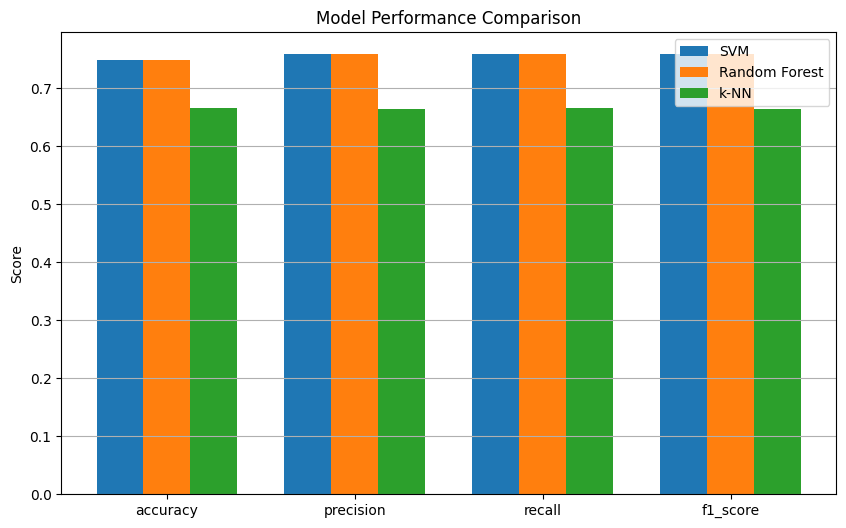

In [8]:
# =========================
# Bar Plot Comparison
# =========================
x = np.arange(len(metrics_names))
width = 0.25

plt.figure(figsize=(10, 6))
for i, model in enumerate(model_names):
    plt.bar(
        x + i * width,
        metrics_matrix[i],
        width,
        label=model,
    )

plt.xticks(x + width, metrics_names)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(axis="y")
plt.show()

In [9]:
# ==================================================
# 📌 Final Dynamic Summary
# ==================================================
best_model = max(
    results.items(),
    key=lambda item: item[1]["f1_score"],
)

print("\n🏆 Final Summary")
for model, metrics in results.items():
    print(f"\n{model}")
    for k, v in metrics.items():
        print(f"  {k:<10}: {v:.4f}")

print(
    f"\n✅ Best overall model based on F1-score: "
    f"{best_model[0]}"
)



🏆 Final Summary

SVM
  accuracy  : 0.7500
  precision : 0.7593
  recall    : 0.7593
  f1_score  : 0.7593

Random Forest
  accuracy  : 0.7500
  precision : 0.7593
  recall    : 0.7593
  f1_score  : 0.7593

k-NN
  accuracy  : 0.6667
  precision : 0.6639
  recall    : 0.6667
  f1_score  : 0.6639

✅ Best overall model based on F1-score: SVM
